# Airbnb Sydney

`imports`

In [624]:
import calmap
import calplot
import calendar
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [455]:
%matplotlib inline

In [456]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [457]:
if os.path.isfile("listings.csv"):
    filepath = "listings.csv"
    print("loading from file")
else:
    filepath = "http://data.insideairbnb.com/australia/nsw/sydney/2021-04-10/visualisations/listings.csv"
    print("retrieve from the inside airbnb")

air_df = pd.read_csv("listings.csv")
print("done")

loading from file
done


In [458]:
air_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,11156,An Oasis in the City,40855,Colleen,NaN,Sydney,-33.86767,151.22497,Private room,65.00,2,196,13/03/2020,1.42,1,364
1,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.86490,151.19171,Private room,143.15,2,526,22/09/2019,4.03,2,0
2,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.80084,151.26378,Entire home/apt,470.00,5,2,2/01/2019,0.03,2,122
3,15253,Unique Designer Rooftop Apartment in City Loca...,59850,Morag,NaN,Sydney,-33.87964,151.21680,Private room,80.00,2,367,7/03/2021,3.30,1,336
4,44545,Sunny Darlinghurst Warehouse Apartment,112237,Atari,NaN,Sydney,-33.87888,151.21439,Entire home/apt,130.00,3,76,3/01/2020,0.60,1,0


In [459]:
#rows, columns
air_df.shape

(32679, 16)

In [460]:
air_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

<h1> Name Data Analysis </h1>

In [461]:
hostnames = air_df.host_name
hostnames

0                            Colleen
1                             Stuart
2                              Heidi
3                              Morag
4                              Atari
                    ...             
32674                         Galina
32675    Cushie - Concierge Services
32676                         Victor
32677                         Victor
32678                           Sean
Name: host_name, Length: 32679, dtype: object

In [462]:
#overall number of names
def overallnames(hostnames):
    count = 0 
    for element in hostnames:
        count +=1
    return count
print("number of overall names: ", overallnames(hostnames))

number of overall names:  32679


<h2> Overall Number of Names </h2>

In [463]:
#overall number of names without dups
hostnames_wdups = len(set(hostnames))
print("number of host names without duplicates:", hostnames_wdups)

number of host names without duplicates: 7500


In [464]:
#all names no dups
listof_hostnames = hostnames.drop_duplicates().tolist()
print(listof_hostnames)

['Colleen', 'Stuart', 'Heidi', 'Morag', 'Atari', 'John', 'Eilish', 'Nicolette', 'Belinda', 'Liz', 'Bryan', 'Pamela', 'Ben', 'Romina', 'Maz', 'Helen', 'Jude', 'Karen', 'James', 'Ann', 'Marianne', 'Nicole', 'Christopher', 'Susanne', 'Mel', 'Family Team -', 'Tobias', 'Diana & Lorenzo', 'Marty', 'Susie', 'Sarah', 'Ingrid', 'Christian', 'Greg', 'Donny', 'Kirsteen', 'Margaret', 'Judy', 'MadeComfy', 'Stefanie', 'Jenni', 'Sally', 'Tommy', 'Laelie', 'Kristin', 'Sophie & Todd', 'Bronwyn', 'Liora', 'Sebastien', 'Jacqui', 'Lynda', 'Hugh', 'Joe', 'Adrian', 'Jess', 'Malou', 'Coleen', 'Bondi Beach Holiday Homes', 'Edwina', 'Carrie', 'Lucy', 'Deborah', 'Kathy', 'Gretchen', 'Ruth', nan, 'Michelle', 'Scott', 'Martha', 'Mina', 'Jen', 'Ann And Mad', 'Jelle', 'Vic And  Lori', 'Paul', 'Micky', 'Michael', 'Thais', 'Janice', 'Claire', 'Mark', 'Cathy', 'Tabitha', 'David', 'Deyaco', 'Leigh & Phillip', 'Anna', 'Jo', 'Craig', 'Brett', 'Maggie', 'Mandy', 'Leonie', 'Ursula', 'Jane', 'Lindy', 'Stafford & Monique', '

<h2> Number of Hosts and Their Names </h2>

In [465]:
#clean id+names of hosts list to determine the most popular names
hostnames_id = air_df[['host_id','host_name']]
nodups_hostnamesid = hostnames_id.drop_duplicates()
nodups_hostnamesid.head()   

,host_id,host_name
0,40855,Colleen
1,17061,Stuart
2,55948,Heidi
3,59850,Morag
4,112237,Atari


In [466]:
number_host = len(nodups_hostnamesid.host_name)
number_host

24406

<h2> Most Popular Names </h2>

In [467]:
#filter the most popular names 
n = 10
topname_count = nodups_hostnamesid.host_name.value_counts()[:n]
topname_count

David      209
James      163
Sarah      156
Michael    151
Chris      133
Paul       128
Andrew     125
Daniel     113
Anna       111
Laura      108
Name: host_name, dtype: int64

In [588]:
name_plotdata = pd.DataFrame({
      "amount": [209, 163, 156, 151, 133, 128, 125, 113, 111, 108], 
    "gender": ["Male", "Male", "Female", "Male", "Male", "Male", "Male", "Male", "Female", "Female"]}, 
    index=["David","James", "Sarah", "Michael", "Chris", "Paul", "Andrew", "Daniel", "Anna", "Laura"]
)
name_plotdata.head()

,amount,gender
David,209,Male
James,163,Male
Sarah,156,Female
Michael,151,Male
Chris,133,Male


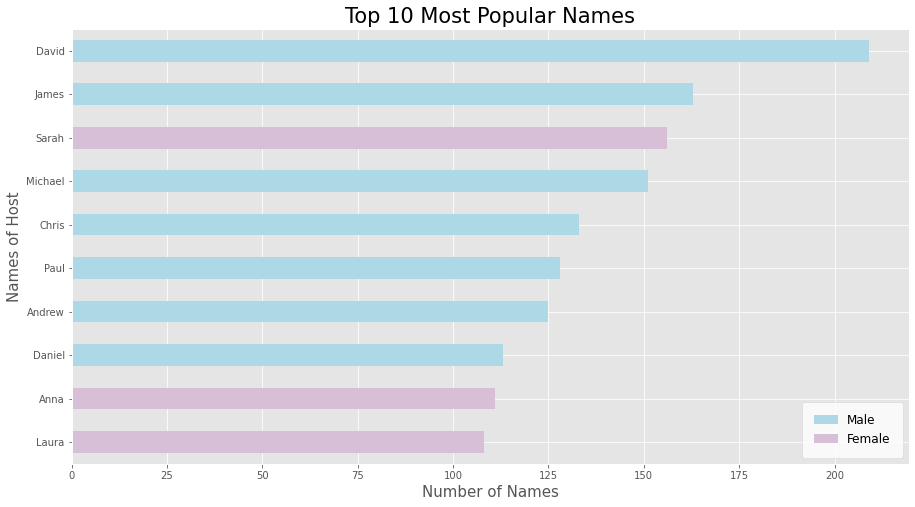

In [625]:
ig, ax = plt.subplots(figsize = (15,8))
colours = {"Male": "lightblue", "Female": "thistle"}
name_plotdata['amount'].plot(
    kind="barh", 
    color=name_plotdata['gender'].replace(colours)).legend([Patch(facecolor=colours['Male']), Patch(facecolor=colours['Female'])],["Male", "Female"],
    loc= 4, frameon=True, borderpad=1, prop={'size':12}, facecolor='white')
plt.title("Top 10 Most Popular Names", fontsize=21)
plt.xlabel("Number of Names", fontsize=15)
plt.ylabel("Names of Host", fontsize=15)
ax.invert_yaxis()

<h2> Where are all the Davids </h2>

In [470]:
n = 10
air_df.host_name = air_df.host_name.astype(str)
how_many_davids_in_dif_loc = air_df[["David" in x for x in air_df.host_name]]
how_many_davids_in_dif_loc[['neighbourhood','host_name']].value_counts()[:n]

neighbourhood  host_name
Randwick       David        67
Sydney         David        62
Waverley       David        44
Warringah      David        17
Pittwater      David        10
Manly          David         9
Auburn         David         9
North Sydney   David         9
Leichhardt     David         9
Marrickville   David         8
dtype: int64

In [471]:
where_david = air_df.loc[(air_df['host_name'] == 'David')]
where_david[['neighbourhood','latitude', 'longitude']]

,neighbourhood,latitude,longitude
99,Lane Cove,-33.80525,151.15999
348,Waverley,-33.90429,151.26863
352,Randwick,-33.92489,151.25566
380,Waverley,-33.88418,151.27417
437,Pittwater,-33.63125,151.33583
...,...,...,...
32031,Sydney,-33.87847,151.19601
32149,Bankstown,-33.89136,151.02875
32183,Waverley,-33.86330,151.28197
32227,Randwick,-33.92330,151.21642


<h2>Map of davids lmao </h2>

<h1> Neighbourhood Analysis </h1>

In [472]:
neighbourhoods = air_df['neighbourhood']
neighbourhoods

0              Sydney
1              Sydney
2               Manly
3              Sydney
4              Sydney
             ...     
32674    Marrickville
32675       Pittwater
32676            Ryde
32677      Canada Bay
32678      Canada Bay
Name: neighbourhood, Length: 32679, dtype: object

<h3> Number of Neighbourhoods and the list </h3>

In [473]:
#number of neighbourhoods
nO_loctions = len(set(neighbourhoods))
print("number of neighbourhoods: ", nO_loctions)

number of neighbourhoods:  38


In [474]:
#the list of neighbourhoods no dups
listof_neighbourhoods = neighbourhoods.drop_duplicates().tolist()
print (listof_neighbourhoods)

['Sydney', 'Manly', 'Mosman', 'Waverley', 'Woollahra', 'Marrickville', 'Hornsby', 'Warringah', 'Rockdale', 'Randwick', 'North Sydney', 'Ku-Ring-Gai', 'Leichhardt', 'Pittwater', 'Sutherland Shire', 'Blacktown', 'Willoughby', 'The Hills Shire', 'Ashfield', 'City Of Kogarah', 'Lane Cove', 'Parramatta', 'Hurstville', 'Canterbury', 'Botany Bay', 'Canada Bay', 'Penrith', 'Hunters Hill', 'Ryde', 'Holroyd', 'Auburn', 'Burwood', 'Camden', 'Liverpool', 'Strathfield', 'Bankstown', 'Campbelltown', 'Fairfield']


<h2> Condensing the original DF for readability </h2>

In [475]:
#condensed listing
condensed = (air_df[['host_name', 'neighbourhood', 'room_type', 'price']])
condensed

,host_name,neighbourhood,room_type,price
0,Colleen,Sydney,Private room,65.00
1,Stuart,Sydney,Private room,143.15
2,Heidi,Manly,Entire home/apt,470.00
3,Morag,Sydney,Private room,80.00
4,Atari,Sydney,Entire home/apt,130.00
...,...,...,...,...
32674,Galina,Marrickville,Entire home/apt,88.00
32675,Cushie - Concierge Services,Pittwater,Entire home/apt,400.00
32676,Victor,Ryde,Entire home/apt,128.00
32677,Victor,Canada Bay,Entire home/apt,110.00


<h1> Airbnb Room Types </h1>

In [476]:
#type of airbnb spaces
spaces = air_df['room_type']
typeof_spaces = dict.fromkeys(spaces).keys()
typeof_spaces

dict_keys(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'])

<h2> How many listings per room types in overall Sydney </h2>

In [477]:
#how many of said type
number_of_spacetypes = spaces.value_counts()
number_of_spacetypes

Entire home/apt    19716
Private room       12150
Shared room          580
Hotel room           233
Name: room_type, dtype: int64

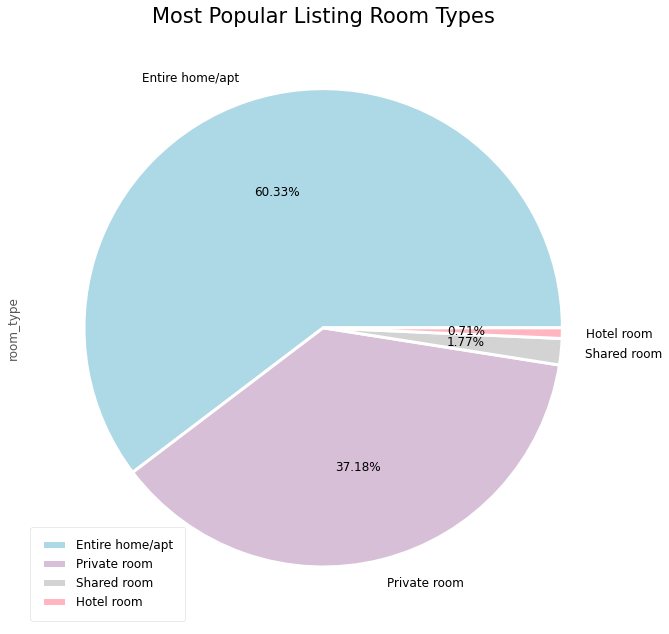

In [478]:
piecolors= ['lightblue', 'thistle', 'lightgrey','lightpink']
fig, ax = plt.subplots(figsize = (20,12))
ax.grid(False)
ax.set_title("Most Popular Listing Room Types", fontsize=21)
number_of_spacetypes.plot(kind= 'pie', colors= piecolors, wedgeprops={'linewidth' : 3, 'edgecolor' : 'white'}, autopct='%.2f%%', fontsize=12, figsize = (15,11))
ax.legend(loc=3, labels=number_of_spacetypes.index, fontsize=13, frameon=True, borderpad=1, prop={'size':12}, facecolor='white')
fig.set_facecolor('white')

<h3> Neighbourhood based - Number of room type listings </h3>

In [479]:
#number of spaces per neighbourhood
air_df['count'] = 1
air_df.groupby(['neighbourhood', 'room_type']).count()['count']

neighbourhood  room_type      
Ashfield       Entire home/apt    125
               Private room       115
               Shared room          9
Auburn         Entire home/apt    202
               Hotel room           5
                                 ... 
Willoughby     Shared room          6
Woollahra      Entire home/apt    903
               Hotel room           6
               Private room       393
               Shared room         10
Name: count, Length: 129, dtype: int64

In [480]:
#Total Prices of Room Types
total_prices_by_room = {'Entire home/apt':0, 'Private room':0, 'Shared room':0, 'Hotel room':0}
for counter,roomType in enumerate(air_df['room_type']):
    total_prices_by_room[roomType] = total_prices_by_room[roomType] + air_df['price'][counter]
print (total_prices_by_room)

{'Entire home/apt': 5839693.0, 'Private room': 1319810.3, 'Shared room': 38567.0, 'Hotel room': 50396.0}


<h2> Average Price of Room Types in Sydney, NSW </h2>

In [481]:
#Average price of rooms - in Sydney NSW
average_price_by_room = {     
    'Entire home/apt': total_prices_by_room['Entire home/apt']/number_of_spacetypes['Entire home/apt'],     
    'Private room ': total_prices_by_room['Private room']/number_of_spacetypes['Private room'],     
    'Shared room ': total_prices_by_room['Shared room']/number_of_spacetypes['Shared room'],     
    'Hotel room': total_prices_by_room['Hotel room']/number_of_spacetypes['Hotel room']}
average_price_by_room

{'Entire home/apt': 296.19055589369043,
 'Private room ': 108.6263621399177,
 'Shared room ': 66.4948275862069,
 'Hotel room': 216.29184549356222}

Text(0.5, 1.0, 'Average Price of Room Types')

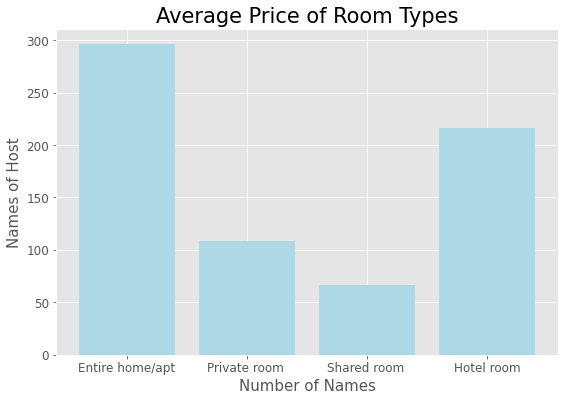

In [482]:
fig, ax = plt.subplots(figsize = (9,6))
ax.grid(True)

keys = average_price_by_room.keys()
values = average_price_by_room.values()
plt.bar(keys, values, color= 'lightblue')
plt.xlabel("Number of Names", fontsize=15)
plt.xticks (fontsize=12)
plt.ylabel("Names of Host", fontsize=15)
plt.yticks (fontsize=12)
plt.title("Average Price of Room Types", fontsize=21)

<h2>Average Price of Neighbourhoods</h2>

In [483]:
#average price of locations (no roomtype influnence)
averageprice_locations = condensed.groupby(['neighbourhood']).mean().sort_values('price', ascending=True)
averageprice_locations.head()

,price
neighbourhood,
Bankstown,91.844622
Blacktown,98.083636
Burwood,100.535088
Canterbury,100.751534
Hurstville,104.535135


<h2>Average Price of Room type Listings based on Neighbourhoods</h2>

In [484]:
#average price of locations
condensed.groupby(['neighbourhood', 'room_type']).mean() #.sort_values

price
neighbourhood room_type                  
Ashfield      Entire home/apt  165.800000
              Private room     141.956522
              Shared room       55.555556
Auburn        Entire home/apt  164.212871
              Hotel room       382.400000
...                                   ...
Willoughby    Shared room       79.666667
Woollahra     Entire home/apt  449.922481
              Hotel room       635.833333
              Private room     164.926209
              Shared room       39.100000

[129 rows x 1 columns]

<h2> Top 10 Most Popular Listing Neighbourhoods</h2>

In [485]:
#most_popular_neighbourhoods = ""
n = 10
most_popular_neighbourhoods = neighbourhoods.value_counts()[:n]
print(most_popular_neighbourhoods)

Sydney          7773
Waverley        4622
Randwick        2989
Warringah       1674
Manly           1599
Woollahra       1312
North Sydney    1184
Pittwater       1144
Marrickville    1098
Rockdale         834
Name: neighbourhood, dtype: int64


<h2>Popular Neighbourhood Region Breakdown</h2>

In [602]:
neighbourhood_plotdata = pd.DataFrame({
      "amount": [7773, 4622, 2989, 1674, 1599, 1312, 1184, 1144, 1098, 834], 
    "Region": ["City", "Eastern Suburb", "Eastern Suburb", "Northern Suburb", "Northern Suburb", "Eastern Suburb", "Northern Suburb", "Northern Suburb", "Western Suburb", "Southern Suburb"]}, 
    index=["Sydney", "Waverley", "Randwick", "Warringah", "Manly", "Woollahra", "North Sydney", "Pittwater", "Marrickville", "Rockdale"]
)
neighbourhood_plotdata.head()

,amount,Region
Sydney,7773,City
Waverley,4622,Eastern Suburb
Randwick,2989,Eastern Suburb
Warringah,1674,Northern Suburb
Manly,1599,Northern Suburb


Text(0, 0.5, 'Sydney Regions')

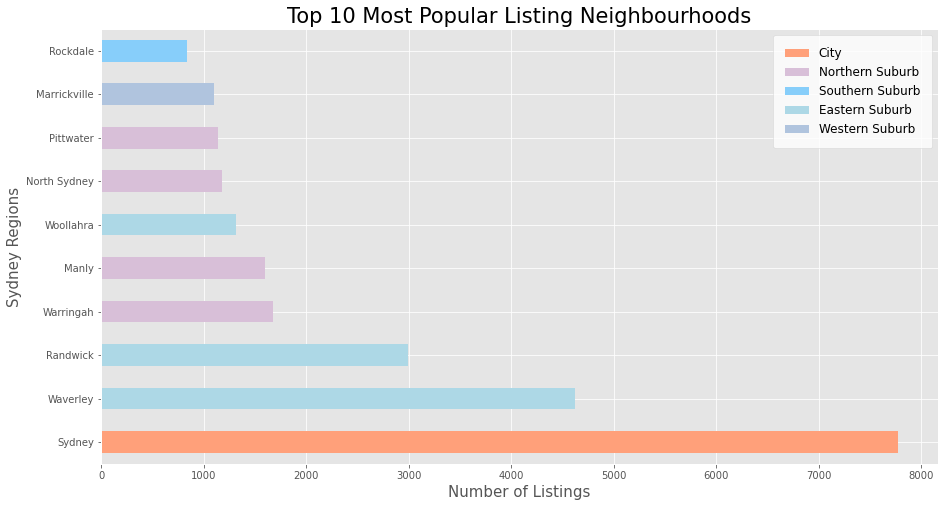

In [621]:
ig, ax = plt.subplots(figsize = (15,8))
colours = {"City":"lightsalmon", "Northern Suburb":"thistle", "Southern Suburb":"lightskyblue", "Eastern Suburb": "lightblue", "Western Suburb":"lightsteelblue"}
neighbourhood_plotdata['amount'].plot(kind="barh", color=neighbourhood_plotdata['Region'].replace(colours)).legend([Patch(facecolor=colours['City']), 
Patch(facecolor=colours['Northern Suburb']), Patch(facecolor=colours['Southern Suburb']), Patch(facecolor=colours['Eastern Suburb']), 
Patch(facecolor=colours['Western Suburb'])],["City", "Northern Suburb", "Southern Suburb", "Eastern Suburb", "Western Suburb"], loc= 1, frameon=True,
borderpad=1, prop={'size':12}, facecolor='white')
plt.title("Top 10 Most Popular Listing Neighbourhoods", fontsize=21)
plt.xlabel("Number of Listings", fontsize=15)
plt.ylabel("Sydney Regions", fontsize=15)

In [487]:
#most average location - pricewise 


<h2> Review listings - Top 10 most popular day </h2>

In [488]:
#reviews
x = 10
top_ten_days = air_df["last_review"].value_counts()[:x]
top_ten_days
#5/4 was the day the most reviews were placed  - notablely it was easter monday 
#28/3 last day lent 

5/04/2021     435
2/01/2020     303
1/01/2020     301
4/04/2021     273
11/04/2021    266
6/04/2021     216
3/01/2020     207
10/04/2021    197
28/03/2021    187
1/01/2019     180
Name: last_review, dtype: int64

<h2> Regular Day vs Public Holidays </h2>

In [623]:
daytype_plotdata = pd.DataFrame({
      "amount": [435, 303, 301, 273, 266, 216, 207, 197, 187, 180], 
    "Type": ["Public Holiday", "Normal Day", "Public Holiday", "Public Holiday", "Normal Day", "Normal Day", "Normal Day", "Normal Day", "Normal Day", "Public Holiday"]}, 
    index=["5/04/2021","2/01/2020", "1/01/2020", "4/04/2021", "11/04/2021", "6/04/2021", "3/01/2020", "10/04/2021", "28/03/2021", "1/01/2019"]
)
daytype_plotdata.head()

,amount,Type
5/04/2021,435,Public Holiday
2/01/2020,303,Normal Day
1/01/2020,301,Public Holiday
4/04/2021,273,Public Holiday
11/04/2021,266,Normal Day


Text(0, 0.5, 'Number of Reviewees')

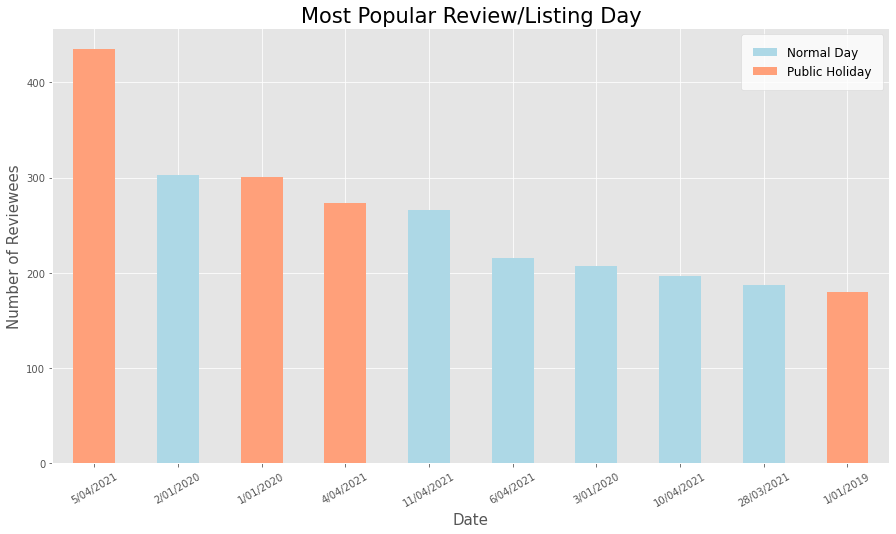

In [634]:
ig, ax = plt.subplots(figsize = (15,8))
colours = {"Normal Day": "lightblue", "Public Holiday": "lightsalmon"}
daytype_plotdata['amount'].plot(
    kind="bar", 
    color=daytype_plotdata['Type'].replace(colours)).legend([Patch(facecolor=colours['Normal Day']), Patch(facecolor=colours['Public Holiday'])],["Normal Day", "Public Holiday"],
    loc= 1, frameon=True, borderpad=1, prop={'size':12}, facecolor='white')
plt.title("Most Popular Review/Listing Day", fontsize=21)
plt.xlabel("Date", fontsize=15)
plt.xticks(rotation=30)
plt.ylabel("Number of Reviewees", fontsize=15)

In [575]:
def plot_calendar(days, months):
    plt.figure(figsize=(18, 6))
    # non days are grayed
    ax = plt.gca().axes
    ax.add_patch(Rectangle((29, 2), width=.8, height=.8, 
                           color='gray', alpha=.3))
    ax.add_patch(Rectangle((30, 2), width=.8, height=.8,
                           color='gray', alpha=.5))
    ax.add_patch(Rectangle((31, 2), width=.8, height=.8,
                           color='gray', alpha=.5))
    ax.add_patch(Rectangle((31, 4), width=.8, height=.8,
                           color='gray', alpha=.5))
    ax.add_patch(Rectangle((31, 6), width=.8, height=.8,
                           color='gray', alpha=.5))
    ax.add_patch(Rectangle((31, 9), width=.8, height=.8,
                           color='gray', alpha=.5))
    ax.add_patch(Rectangle((31, 11), width=.8, height=.8,
                           color='gray', alpha=.5))
    for d, m in zip(days, months):
        ax.add_patch(Rectangle((d, m), 
                               width=.8, height=.8, color='lightpink'))
    plt.yticks(np.arange(1, 13)-.1, list(calendar.month_abbr)[1:])
    plt.xticks(np.arange(1, 32)-.1, np.arange(1,32))
    plt.xlim(1, 32)
    plt.ylim(1, 13)
    plt.gca().invert_yaxis()
    # remove borders and ticks
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
    plt.tick_params(top=False, bottom=False, left=False, right=False)
    plt.title("Top 10 Most Popular Neighbourhoods", fontsize=21)
    plt.xlabel("Months", fontsize=15)
    plt.ylabel("Days", fontsize=15)
    plt.show()

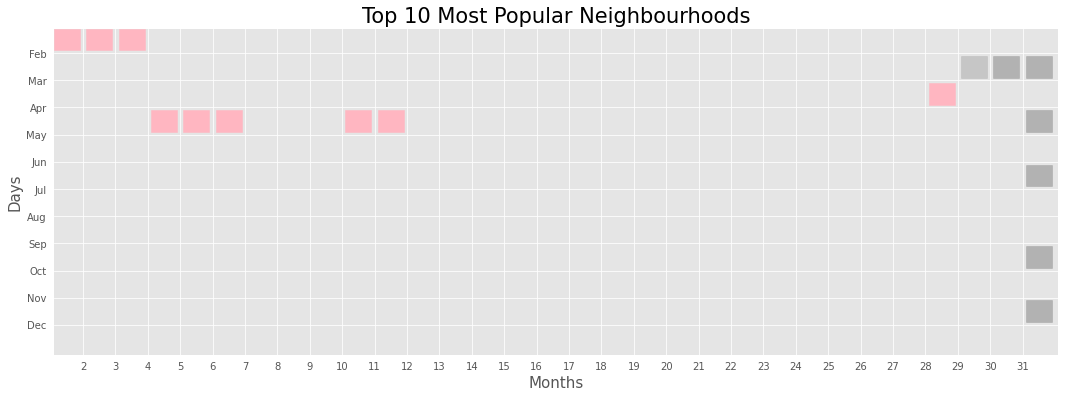

In [576]:
#review dates
day = [1, 2, 3, 28, 4, 5, 6, 10, 11]
month = [1, 1, 1, 3, 4, 4, 4, 4, 4]
plot_calendar(day, month)

<img src="AIRBNB/pubHol.png" alt="Easter Weekend" width="500"/>

<h2>Whats happening on the 28th of March 2021</h2>

In [492]:
n = 10
air_df.last_review = air_df.last_review.astype(str)
wat_happened = air_df[["28/03/2021" in x for x in air_df.last_review]]
wat_happened[['neighbourhood','last_review']].value_counts()[:n]

neighbourhood     last_review
Sydney            28/03/2021     59
Waverley          28/03/2021     14
Pittwater         28/03/2021     14
Sutherland Shire  28/03/2021     10
Marrickville      28/03/2021      9
Rockdale          28/03/2021      9
Manly             28/03/2021      8
Randwick          28/03/2021      8
North Sydney      28/03/2021      7
Warringah         28/03/2021      5
dtype: int64

In [493]:
sydney_bubble_march = air_df.loc[(air_df['neighbourhood'] == 'Sydney')&(air_df['last_review'] == '28/03/2021')]
sydney_bubble_march[['neighbourhood','latitude', 'longitude', 'last_review']].head()

,neighbourhood,latitude,longitude,last_review
128,Sydney,-33.86340,151.21103,28/03/2021
306,Sydney,-33.88046,151.21516,28/03/2021
400,Sydney,-33.88706,151.21403,28/03/2021
428,Sydney,-33.86793,151.22480,28/03/2021
1764,Sydney,-33.86920,151.19760,28/03/2021


<img src="AIRBNB/marchRun.png" alt="NAB WestRun" width="500"/> 